In [1]:
import numpy as np
import pandas as pd
import sounddevice as sd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft

https://python-sounddevice.readthedocs.io/en/0.4.7/usage.html#playback

## choose default device for input and output  
and test it

In [77]:

sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
   1 Stereomix (Realtek(R) Audio), MME (2 in, 0 out)
>  2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   5 Primärer Soundaufnahmetreiber, Windows DirectSound (2 in, 0 out)
   6 Stereomix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   7 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   8 Primärer Soundtreiber, Windows DirectSound (0 in, 2 out)
   9 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  10 Speaker (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  11 Microphone Array (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  12 Stereomix (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  13 Mic in at front panel (black) (Mic in at front panel (black)), Windows WDM-KS (2 in, 0 out)
  14 Speakers 1 (Realtek HD Audio output with HAP), Windows WDM-KS (0 in, 2 out)
  15 Speak

In [3]:

# select default device from the list and test it
#[microfon, speaker]
sd.default.device = [2,4]

# Define parameters
duration = 5  # seconds
sample_rate = 44100  # Hz

# Number of frames to record
frames = int(duration * sample_rate)

# Record audio
print("Recording...")
audio_signal = sd.rec(frames, samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

# Flatten the recorded signal (if necessary)
audio_signal = audio_signal.flatten()

# Print shape of the recorded signal
print("Recorded signal shape:", audio_signal.shape)

sd.play(audio_signal)

Recording...
Recording finished.
Recorded signal shape: (220500,)


In [4]:
sd.play(audio_signal)

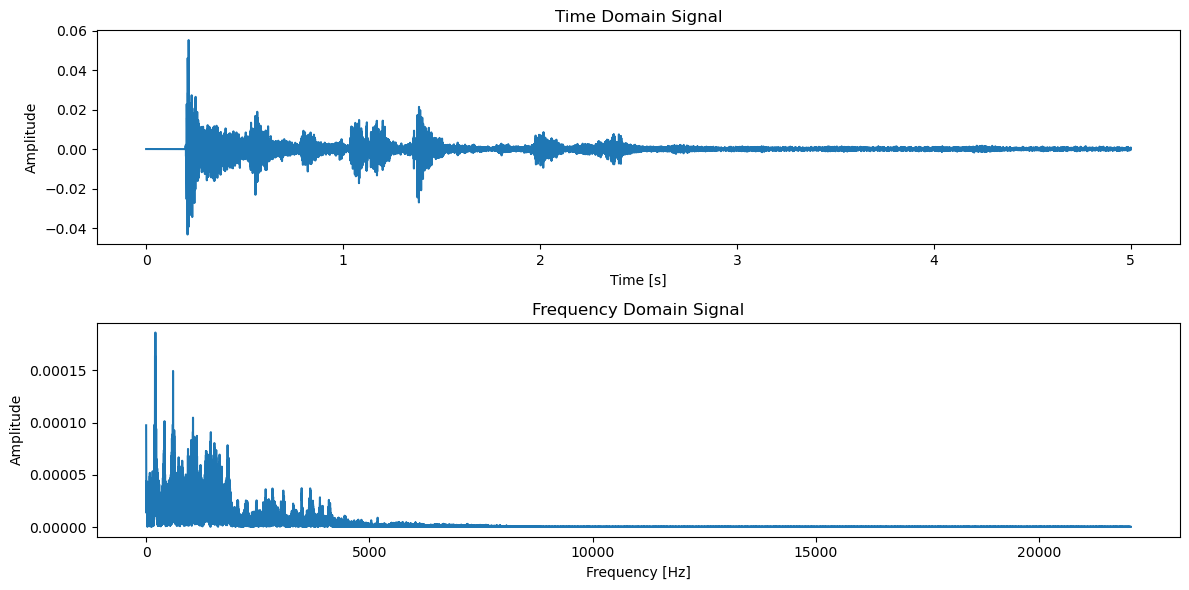

In [5]:
def analyze_audio_signal(audio_signal):
    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(2, 1, 2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

# Example usage
analyze_audio_signal(audio_signal)

Recording...
Recording finished.
Playing back the recorded audio...
Playback finished.


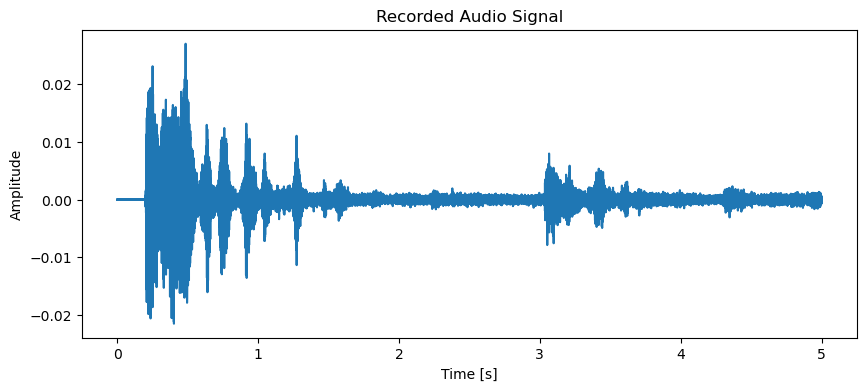

In [6]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

def test_sd_rec(duration=5, sample_rate=44100):
    # Define parameters
    channels = 1  # Mono

    # Record audio
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")

    # Play back the recorded audio
    print("Playing back the recorded audio...")
    sd.play(audio_signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print("Playback finished.")

    # Plot the recorded signal
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_signal)
    plt.title("Recorded Audio Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

# Run the test
test_sd_rec()


## fft analysis microphon 
works with streaming from streaming tv  
but not from voice

In [116]:


def analyze_microphone_signal(duration=2, sample_rate=44100):
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")
    
    sd.play(audio_signal)

    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 2)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(3, 1, 3)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})

    plt.subplot(3, 1, 1)
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal detail")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    return(audio_signal, df_f)

    

# Example usage
#original_signal, df_fft = analyze_microphone_signal(duration = 5)


Recording...
Recording finished.


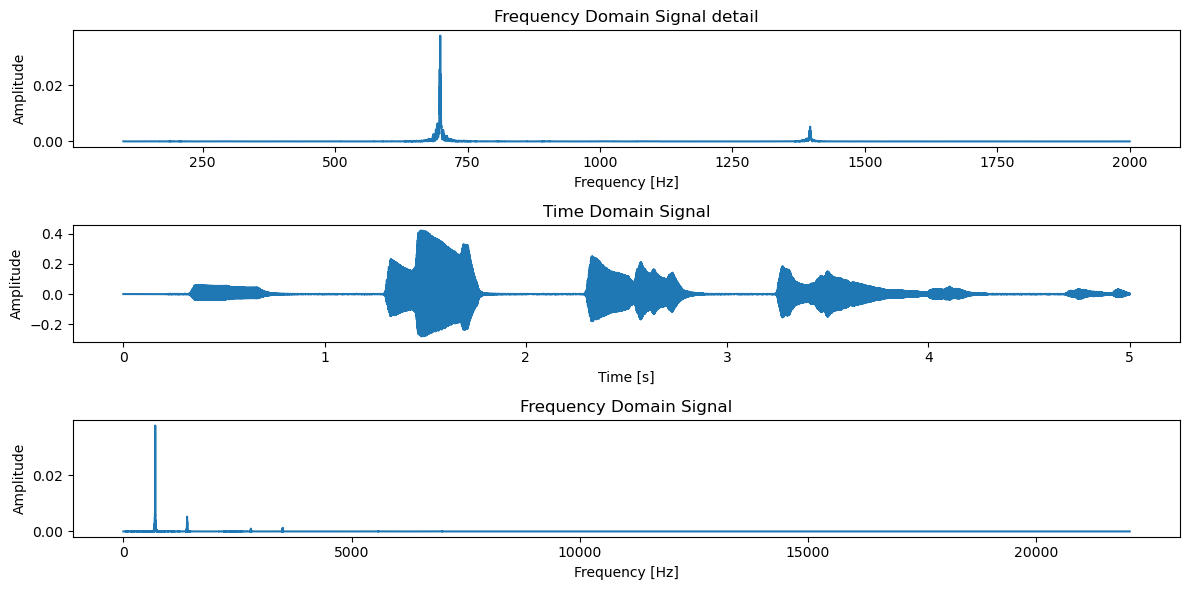

In [20]:
original_signal2, df_fft = analyze_microphone_signal(duration = 5)

### Sample data

Recording...
Recording finished.


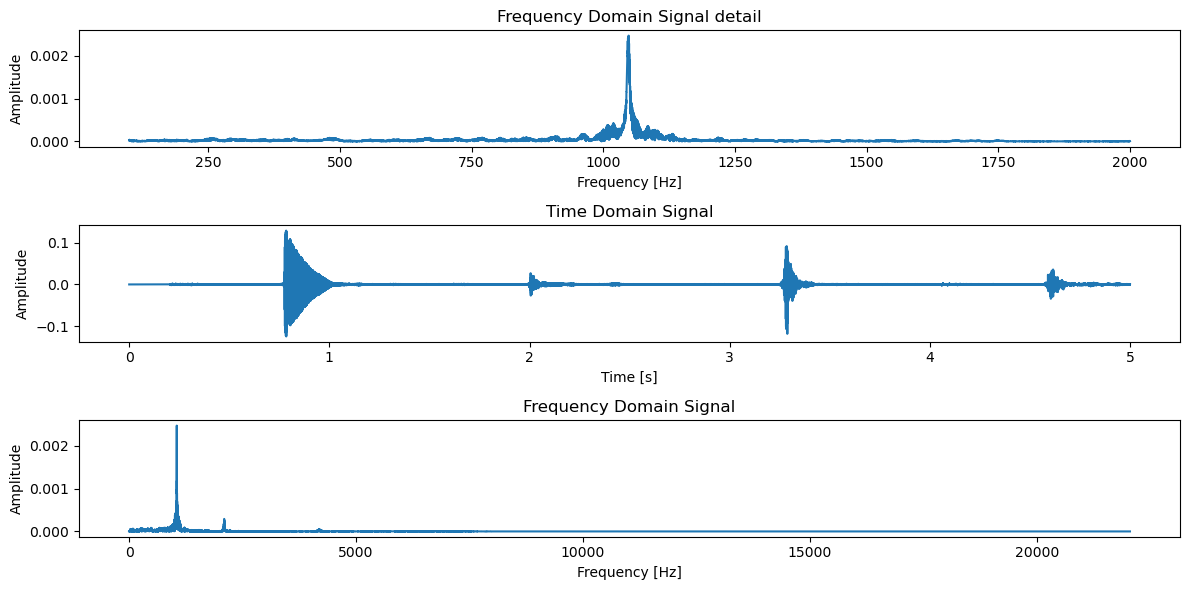

In [31]:
original_signal_hoch, df_fft = analyze_microphone_signal(duration = 5)

Recording...
Recording finished.


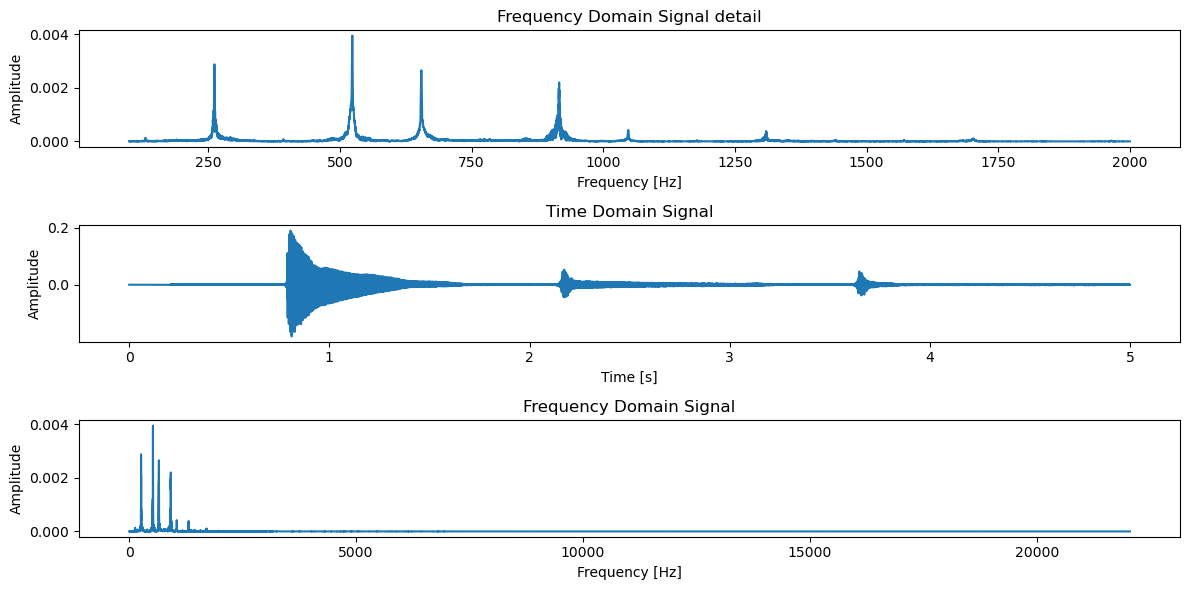

In [29]:
original_signal_tief, df_fft = analyze_microphone_signal(duration = 5)

Recording...
Recording finished.


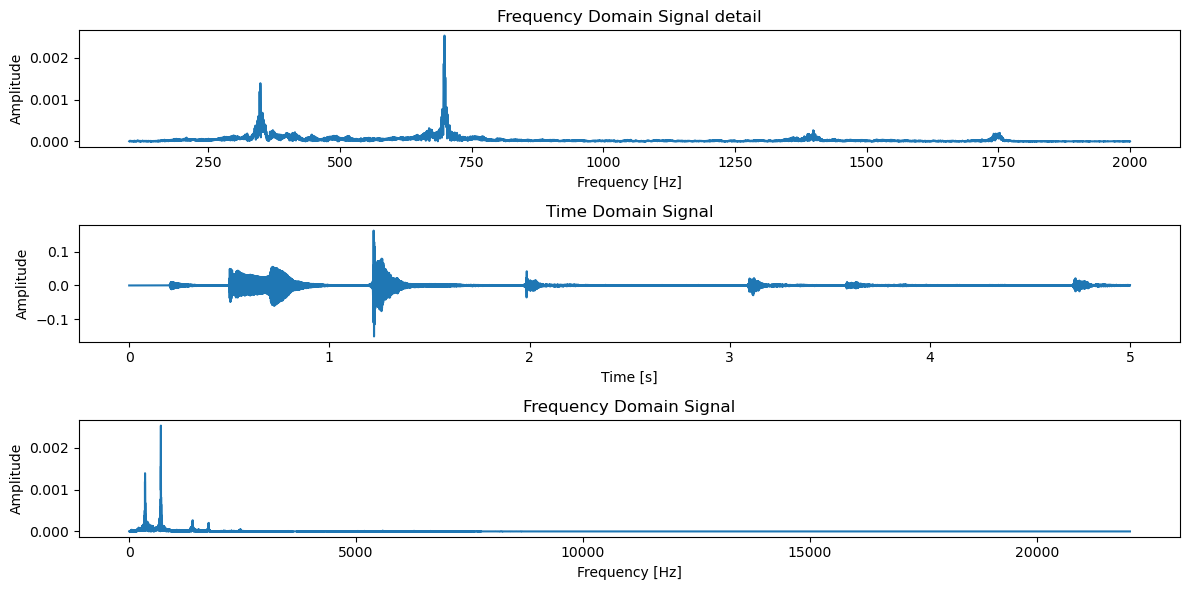

In [67]:
original_signal_mitte, df_fft = analyze_microphone_signal(duration = 5)

In [35]:

df_tief = pd.DataFrame({'signal' : original_signal_tief})
df_tief['label'] = "tief keyboard"

df_hoch = pd.DataFrame({'signal' : original_signal_hoch})
df_hoch['label'] = "hoch keyboard"

df_sample_data = pd.concat([df_tief, df_hoch])

#df_sample_data.to_csv("sample_data/keyboard_hoch_tief.csv")

Recording...
Recording finished.


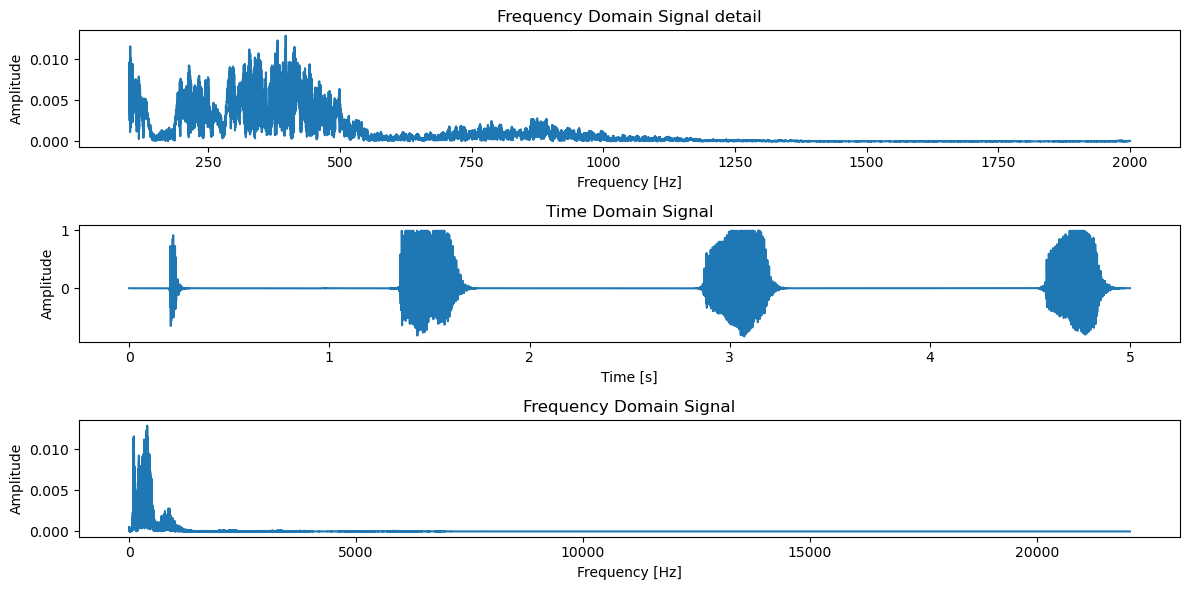

In [82]:
original_human, df_fft = analyze_microphone_signal(duration = 5)

Recording...
Recording finished.


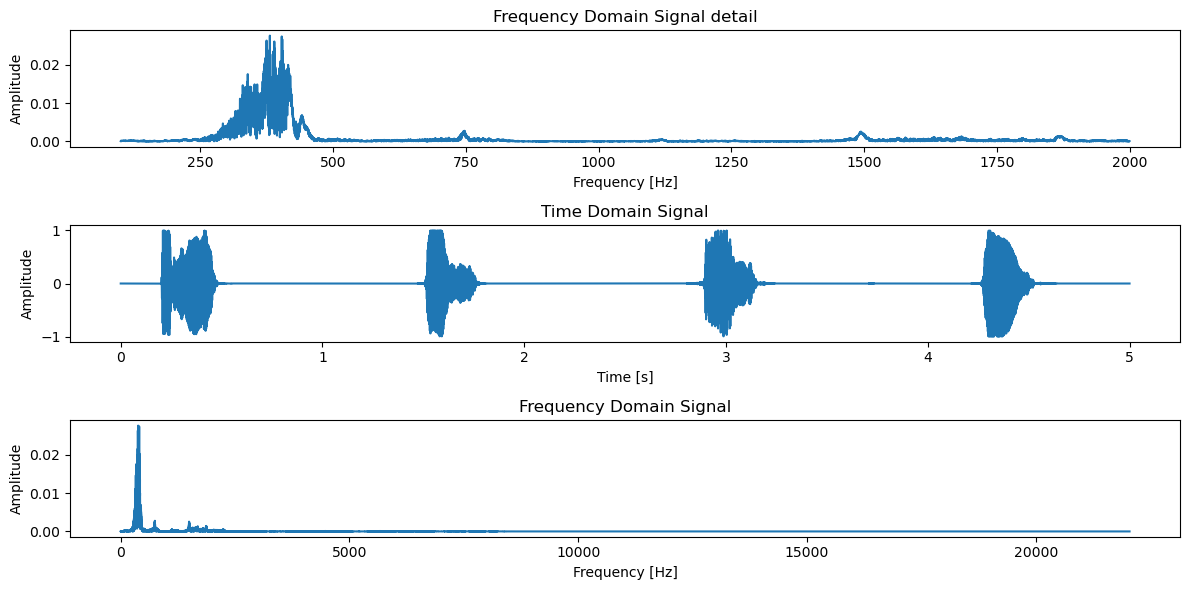

In [84]:
original_human_hoch, df_fft = analyze_microphone_signal(duration = 5)

In [86]:
df_human_tief = pd.DataFrame({'signal' : original_human})
df_human_tief['label'] = "tief human"
df_human_hoch = pd.DataFrame({'signal' : original_human_hoch})
df_human_hoch['label'] = "hoch human"

df_sample_human = pd.concat([df_human_tief, df_human_hoch])
#df_sample_human.to_csv("sample_data/human_hoch_tief.csv")

In [ ]:
original_signal, df_fft = analyze_microphone_signal(duration = 1)

In [ ]:
original_signal, df_fft = analyze_microphone_signal(duration = 1)

In [ ]:
original_signal, df_fft = analyze_microphone_signal(duration = 1)

### analyse sample data

In [7]:
df_sample = pd.read_csv("sample_data/keyboard_hoch_tief.csv")
df_sample_human = pd.read_csv("sample_data/human_hoch_tief.csv")

In [78]:


df_mitte = pd.DataFrame({'signal' : original_signal_mitte})
df_mitte['label'] = "mitte keyboard"

df_sample_new = pd.concat([df_sample, df_mitte])
#df_sample_new[['signal', 'label']].to_csv("sample_data/keyboard_hoch_tief.csv")

NameError: name 'original_signal_mitte' is not defined

In [9]:

df_sample_tief = df_sample[df_sample.label == "tief keyboard"]['signal'].to_list()
df_sample_hoch = df_sample[df_sample.label == "hoch keyboard"]['signal'].to_list()
#df_sample_mitte = df_sample[df_sample.label == "mitte keyboard"]['signal'].to_list()
df_sample_human_tief = df_sample_human[df_sample_human.label == "tief human"]['signal'].to_list()
df_sample_human_hoch = df_sample_human[df_sample_human.label == "hoch human"]['signal'].to_list()

sd.play(df_sample_human_tief)

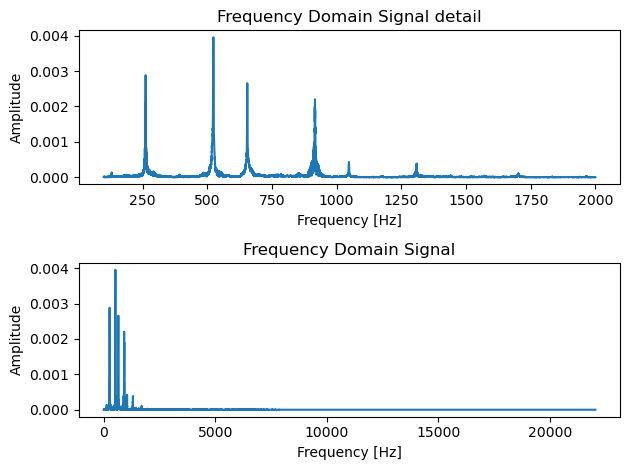

Dominant Frequencies:  [260.4 261.2 261.4 261.8 262.  262.2 262.4 262.6 263.2 519.4 519.6 519.8
 520.  520.2 520.4 520.6 520.8 521.  521.2 521.4 521.6 521.8 522.  522.2
 522.4 522.6 522.8 523.  523.2 523.4 523.6 523.8 524.  524.2 524.4 524.6
 524.8 525.  525.2 525.4 525.6 525.8 526.  526.2 526.4 526.6 653.4 653.6
 653.8 654.  654.2 654.4 654.6 654.8 655.  655.2 655.4 655.6 655.8 656.
 656.2 914.6 914.8 915.  915.2 915.4 915.6 915.8 916.  916.2 916.4 916.6
 916.8 917.  917.2 917.4 917.6 917.8 918. ]


In [10]:
def fft_from_signal(audio_signal,sample_rate = 44100):
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(2, 1, 2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})

    plt.subplot(2, 1, 1)
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal detail")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    # Find the dominant frequencies
    threshold = 0.001
    
    
    dominant_freq_indices = np.where(yf[:N // 2] >= threshold)[0]
    dominant_freqs = xf[dominant_freq_indices]

    print("Dominant Frequencies: ", dominant_freqs)

    return(df_f)

fft_tief = fft_from_signal(df_sample_tief)
fft_tief['label'] = "tief keyboard"

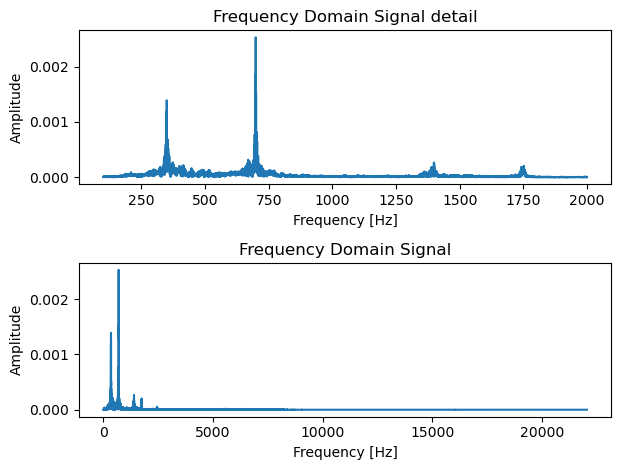

Dominant Frequencies:  []


In [14]:
fft_mitte = fft_from_signal(df_sample_mitte)
fft_mitte['label'] = "mitte keyboard"

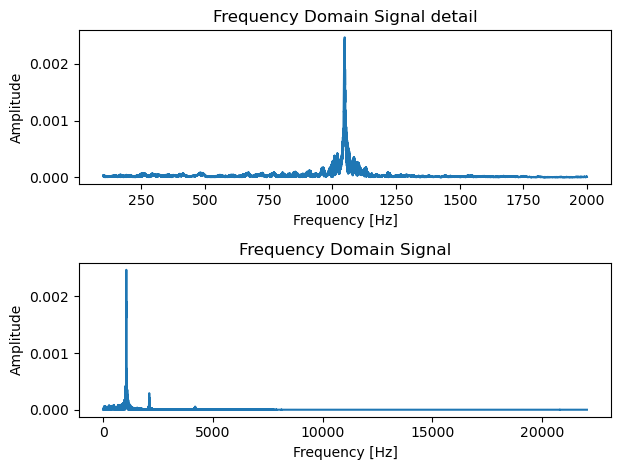

Dominant Frequencies:  [1044.  1044.2 1044.4 1044.6 1044.8 1045.  1045.2 1045.4 1045.6 1045.8
 1046.  1046.2 1046.4 1046.6 1046.8 1047.  1047.2 1047.4 1047.6 1047.8
 1048.  1048.2 1048.4 1048.6 1048.8 1049.  1049.2 1049.4 1049.6 1049.8
 1050.  1050.2 1050.4 1050.6 1050.8 1051.  1051.4 1051.8]


In [11]:
fft_hoch = fft_from_signal(df_sample_hoch)
fft_hoch['label'] = "hoch keyboard"

<AxesSubplot: xlabel='f', ylabel='psd'>

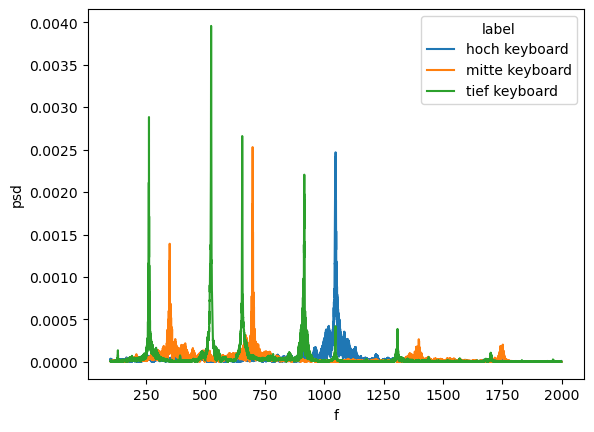

In [78]:
df_plot = pd.concat([fft_hoch,fft_mitte, fft_tief])
df_plot
sns.lineplot(data = df_plot[ (df_plot.f > 100) &(df_plot.f < 2000)], x = 'f', y= 'psd', hue = 'label')

Text(0, 0.5, 'Amplitude')

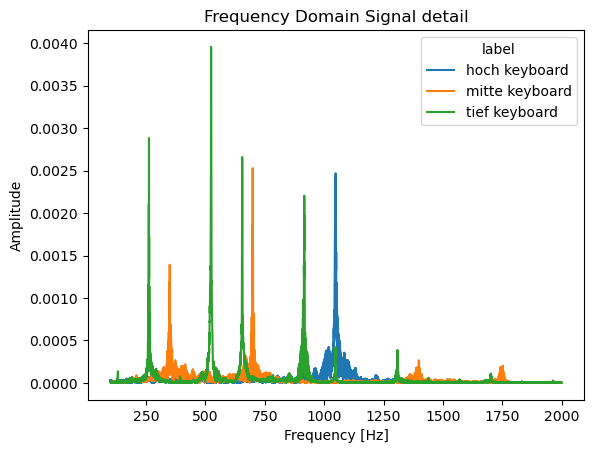

In [80]:
df_plot = pd.concat([fft_hoch, fft_mitte,fft_tief])

sns.lineplot(data = df_plot[ (df_plot.f > 100) &(df_plot.f < 2000)], x = 'f', y= 'psd', hue = 'label')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency Domain Signal detail")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")

<AxesSubplot: xlabel='f', ylabel='Count'>

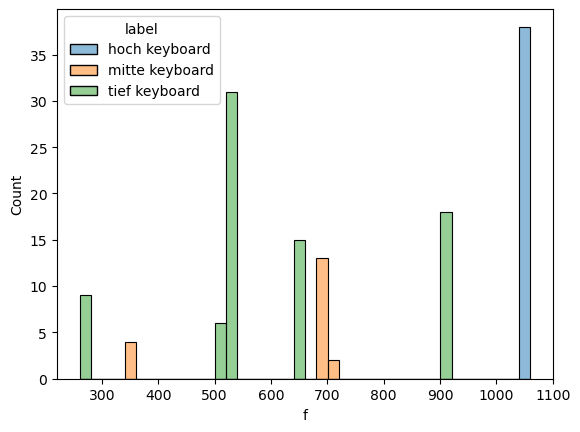

In [81]:
sns.histplot(data=df_plot[df_plot.psd > 0.001], x = 'f', hue = 'label', binwidth=20)

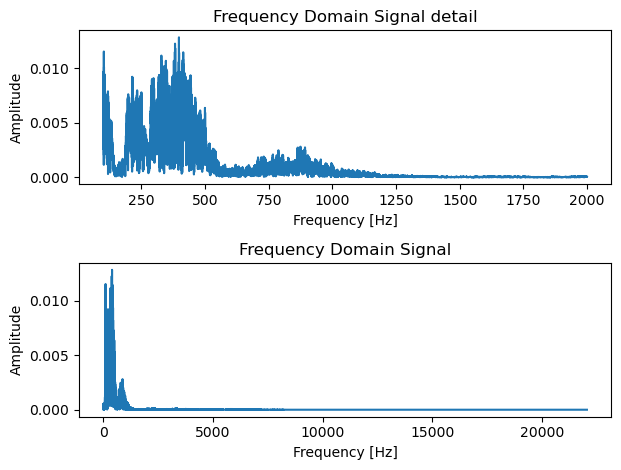

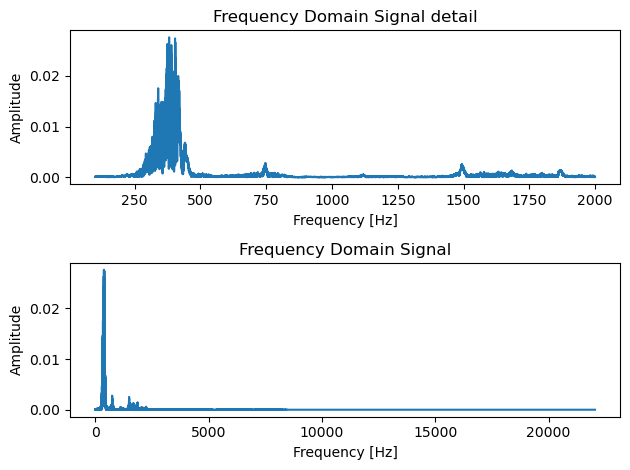

In [90]:
fft_human_tief = fft_from_signal(df_sample_human_tief)
fft_human_tief['label'] = "tief human"
fft_human_hoch = fft_from_signal(df_sample_human_hoch)
fft_human_hoch['label'] = "hoch human"
fft_human = pd.concat([fft_human_tief, fft_human_hoch])

Text(0, 0.5, 'Amplitude')

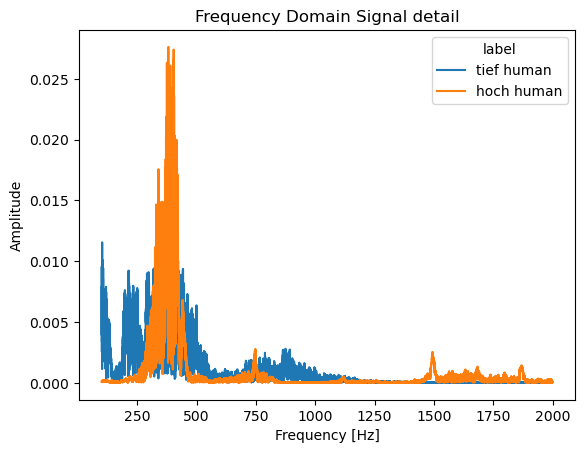

In [91]:
sns.lineplot(data = fft_human[ (fft_human.f > 100) &(fft_human.f < 2000)], x = 'f', y= 'psd', hue = 'label')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency Domain Signal detail")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")

<AxesSubplot: xlabel='f', ylabel='Count'>

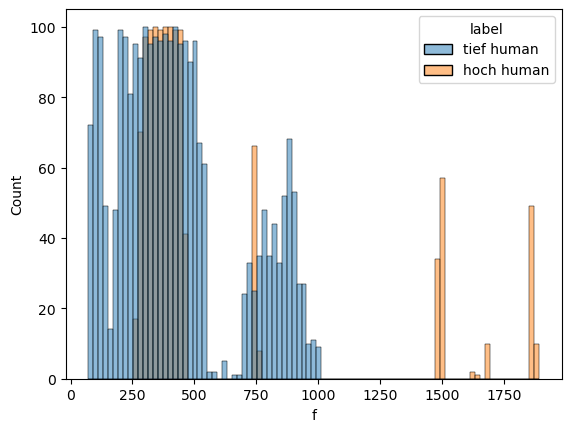

In [92]:
sns.histplot(data=fft_human[fft_human.psd > 0.001], x = 'f', hue = 'label', binwidth=20)

## test

In [33]:
df_sample_human[['signal']]
yf = fft(df_sample_human[['signal']])
#audio_signal

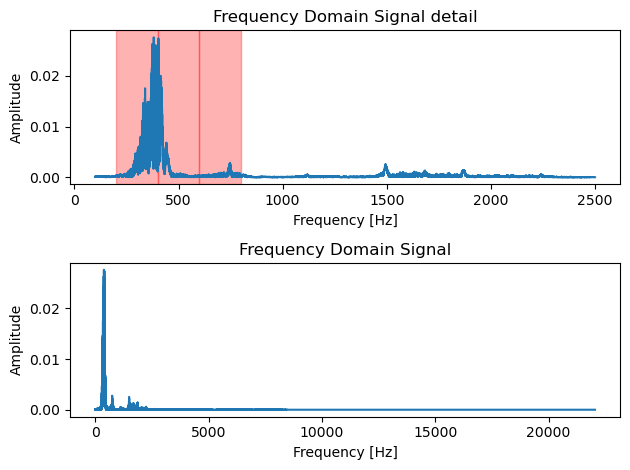

[(200, 400), (400, 600), (600, 800)]
[1 2 3]


In [115]:
def fft_from_signal(audio_signal,sample_rate = 44100, band_width = 200):
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(2, 1, 2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    positive_magnitudes = yf[:N//2] 
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})



    # Calculate the number of bands
    num_bands = int(np.max(xf) // band_width) + 1

    # Sum the magnitudes within each band
    band_magnitudes = np.zeros(num_bands)
    for i in range(num_bands):
        band_start_freq = i * band_width
        band_end_freq = (i + 1) * band_width
        band_mask = (xf >= band_start_freq) & (xf < band_end_freq)
        band_magnitudes[i] = np.sum(abs(positive_magnitudes[band_mask]))

    # Identify the three most dominant bands
    dominant_bands_indices = np.argsort(band_magnitudes)[-3:][::-1]
    dominant_bands = [(i * band_width, (i + 1) * band_width) for i in dominant_bands_indices]


    plt.subplot(2, 1, 1)
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2500)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    for band in dominant_bands:
        plt.axvspan(band[0], band[1], color='red', alpha=0.3, label=f'{band[0]} Hz - {band[1]} Hz')
    plt.title("Frequency Domain Signal detail")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    

    return( dominant_bands,df_f, band_magnitudes,positive_magnitudes, dominant_bands_indices)

dominant_bands,df_f,band_magnitudes_test,positive_magnitudes, dominant_bands_indices_test = fft_from_signal(df_sample_human_hoch)
N = len(df_sample_human_hoch)
print(dominant_bands)
print(dominant_bands_indices_test)

In [70]:


print(dominant_bands)
df_f

    # Sum the magnitudes within each band

xf = df_f.f
yf = df_f.psd


band_width = 100
num_bands = int(np.max(xf) // band_width) + 1
band_magnitudes = np.zeros(num_bands)
for i in range(num_bands):
    band_start_freq = i * band_width
    band_end_freq = (i + 1) * band_width
    band_mask = (xf >= band_start_freq) & (xf < band_end_freq)
    band_magnitudes[i] = np.sum(positive_magnitudes[band_mask])

dominant_bands_indices = np.argsort(band_magnitudes)[-3:][::-1]

np.argsort(band_magnitudes)[-3:][::-1]

dominant_bands = [(i * band_width, (i + 1) * band_width) for i in dominant_bands_indices]
print(dominant_bands_indices)
dominant_bands

[(300, 400), (1400, 1500), (2100, 2200)]
[ 3 14 21]


C:\Users\rigle\AppData\Local\Temp\ipykernel_996\1273237720.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  band_magnitudes[i] = np.sum(positive_magnitudes[band_mask])


[(300, 400), (1400, 1500), (2100, 2200)]

In [95]:
np.arange(1, 10, 3)

array([1, 4, 7])

[  68.32791965  105.45064446 3076.43426171]


<AxesSubplot: xlabel='x', ylabel='y'>

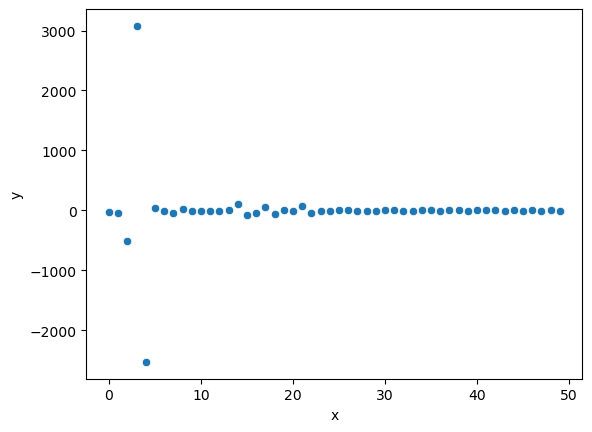

In [105]:

print(band_magnitudes_test[np.argsort(band_magnitudes_test)[-3:]])
#print(band_magnitudes[np.argsort(band_magnitudes)[13:]])

df_plot = pd.DataFrame({'y' : band_magnitudes_test,
                       'x' : np.arange(0, num_bands, 1)})



sns.scatterplot(data = df_plot[df_plot.x <50] ,y = 'y' ,x ='x')

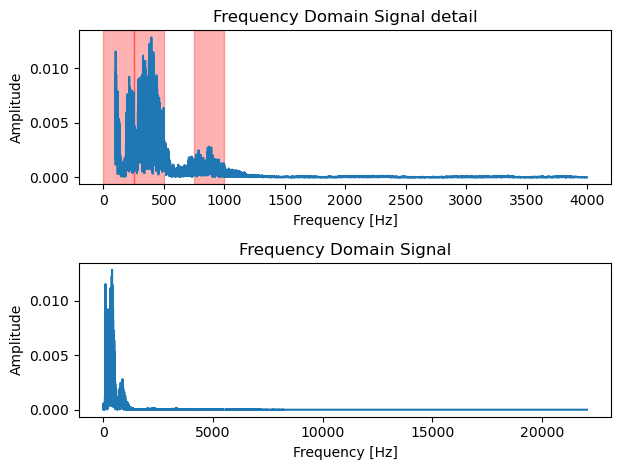

([(250, 500), (0, 250), (750, 1000)],
               f           psd
 0           0.0  4.692662e-04
 1           0.2  1.675860e-04
 2           0.4  6.829549e-05
 3           0.6  5.328683e-04
 4           0.8  1.532398e-04
 ...         ...           ...
 110245  22049.0  3.402056e-08
 110246  22049.2  4.508253e-08
 110247  22049.4  5.022520e-08
 110248  22049.6  3.628074e-08
 110249  22049.8  3.236693e-08
 
 [110250 rows x 2 columns],
 array([3.02259647e+05, 6.04981481e+05, 1.02108342e+05, 1.23803631e+05,
        3.03513179e+04, 6.43748795e+03, 3.45384096e+03, 3.22624596e+03,
        5.50245318e+03, 5.30852527e+03, 1.71792049e+03, 3.07927019e+03,
        3.76666423e+03, 4.08840846e+03, 2.60631539e+03, 3.07764538e+03,
        4.58845978e+02, 3.53065582e+02, 6.06776103e+02, 1.14181072e+03,
        1.97991276e+03, 1.47743944e+03, 1.23736217e+03, 3.34886925e+03,
        2.21166691e+03, 1.05261225e+03, 9.73926907e+02, 7.71320652e+02,
        3.69929629e+02, 1.60984662e+02, 2.19170899e+02, 

In [113]:
fft_from_signal(df_sample_human_tief)

Frequency Band: 6000 Hz - 7000 Hz
Frequency Band: 13000 Hz - 14000 Hz
Frequency Band: 20000 Hz - 21000 Hz


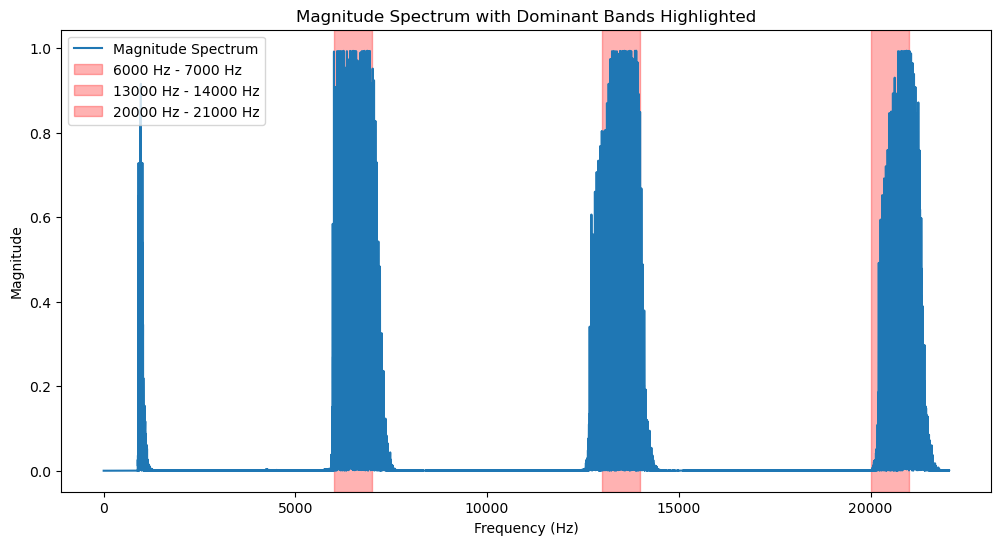

In [54]:
#import numpy as np
#import matplotlib.pyplot as plt

# Assuming you have your audio signal and sampling rate
audio_signal = df_sample_human[['signal']]
sampling_rate = 44100

    # Frequency-domain plot
N = len(audio_signal)
T = 1.0 / sampling_rate
yf = fft(audio_signal)
xf = np.fft.fftfreq(N, T)#[:N//2]

# Perform FFT
fft_result = yf#np.fft.fft(audio_signal)
frequencies = xf#np.fft.fftfreq(len(audio_signal), d=1/sampling_rate)
magnitude_spectrum = np.abs(fft_result)

# Focus on positive frequencies only
positive_freqs = frequencies[:len(frequencies)//2]
positive_magnitudes = magnitude_spectrum[:len(magnitude_spectrum)//2]

# Define the frequency band width (10 Hz)
band_width = 1000

# Calculate the number of bands
num_bands = int(np.max(positive_freqs) // band_width) + 1

# Sum the magnitudes within each band
band_magnitudes = np.zeros(num_bands)
for i in range(num_bands):
    band_start_freq = i * band_width
    band_end_freq = (i + 1) * band_width
    band_mask = (positive_freqs >= band_start_freq) & (positive_freqs < band_end_freq)
    band_magnitudes[i] = np.sum(positive_magnitudes[band_mask])

# Identify the three most dominant bands
dominant_bands_indices = np.argsort(band_magnitudes)[-3:][::-1]
dominant_bands = [(i * band_width, (i + 1) * band_width) for i in dominant_bands_indices]

# Print the most dominant bands and their magnitudes
for band in dominant_bands:
    print(f"Frequency Band: {band[0]} Hz - {band[1]} Hz")

# Optionally, plot the magnitude spectrum and highlight dominant bands
plt.figure(figsize=(12, 6))
plt.plot(positive_freqs, positive_magnitudes, label='Magnitude Spectrum')
for band in dominant_bands:
    plt.axvspan(band[0], band[1], color='red', alpha=0.3, label=f'{band[0]} Hz - {band[1]} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum with Dominant Bands Highlighted')
plt.legend()
plt.show()


In [52]:
len(band_mask)
print("magnitudeds:", len(positive_magnitudes))
print(len(band_mask))
len(positive_freqs)

magnitudeds: 220500
110250


110250

## spectogram
https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520  
https://www.simplilearn.com/tutorials/python-tutorial/speech-recognition-in-python   
https://pypi.org/project/SpeechRecognition/

In [4]:
df_sample = pd.read_csv("sample_data/keyboard_hoch_tief.csv")
df_sample_human = pd.read_csv("sample_data/human_hoch_tief.csv")

In [5]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [6]:
spectrogram(df_sample, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14)

AttributeError: 'DataFrame' object has no attribute 'strides'

In [ ]:
## voice recognition
https://reintech.io/blog/how-to-create-a-voice-recognition-system-with-python